In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
    # connect every node in the layer to every node in preceding layer 
    # which is the case for full connected neural networks
from keras.optimizers import Adam 
    # Combination two Stochastic Gradient Descent: Adagrad and RMSprop
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
np.random.seed(0) # make your random number is stable

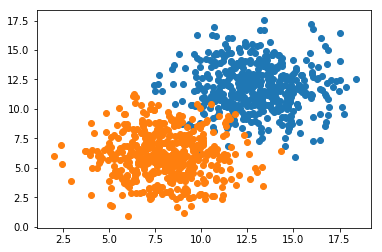

In [22]:
n_pts = 500

Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T # the array of labels

plt.scatter(X[:n_pts, 0], X[:n_pts, 1]) # from point #1-#500
plt.scatter(X[n_pts:, 0], X[n_pts:, 1]) # from last point to more 500

In [23]:
model = Sequential()
model.add(Dense(units= 1, input_shape= (2,), activation= 'sigmoid')) 
    # units = number of output nodes in this layer
    # input_shape = dimension of input layer
    # activation: choose your activation function
adam = Adam(lr = 0.1)
model.compile(adam, loss= 'binary_crossentropy', metrics= ['accuracy'])
    # loss: calculate error with binary_crossentropy that calculates the cross entropy value for binary classification problems
    # metrics: a metric is not used to train the model but simply to measure the performace at every epoch 
h = model.fit(x= X, y= y, verbose= 1, batch_size= 50, epochs= 30, shuffle= 'true')
    # train the model to fix dataset X with labels y
    # what verbose does is simply display progress bar of information relating the performace of our model at each epoch. But verbose = 0 doesn't display anything.
    # an epoch simply refers to iterating over the entire dataset.
    # if epoch is too big to feed to the computer all at once, we need to divide it into serveral smaller batches. In this case, we have 1000 points, so batch_size of 50 will take 20 iterations to complete to an epoch
    # shuffle our training before each epoch. if training data is unchanged over all trainning iterations, Gradient Descent will tend to get stuck in local minimum instead of move closer to global minium

Epoch 1/30
1000/1000 [==============================] - 1s 953us/step - loss: 1.4940 - acc: 0.5370
Epoch 2/30
1000/1000 [==============================] - 0s 50us/step - loss: 0.6486 - acc: 0.5980
Epoch 3/30
1000/1000 [==============================] - 0s 47us/step - loss: 0.4449 - acc: 0.8490
Epoch 4/30
1000/1000 [==============================] - 0s 45us/step - loss: 0.3878 - acc: 0.8950
Epoch 5/30
1000/1000 [==============================] - 0s 47us/step - loss: 0.3444 - acc: 0.9050
Epoch 6/30
1000/1000 [==============================] - 0s 49us/step - loss: 0.3114 - acc: 0.9250
Epoch 7/30
1000/1000 [==============================] - 0s 48us/step - loss: 0.2921 - acc: 0.9310
Epoch 8/30
1000/1000 [==============================] - 0s 53us/step - loss: 0.2642 - acc: 0.9390
Epoch 9/30
1000/1000 [==============================] - 0s 77us/step - loss: 0.2376 - acc: 0.9580
Epoch 10/30
1000/1000 [==============================] - 0s 67us/step - loss: 0.2218 - acc: 0.9630
Epoch 11/30
1000/1

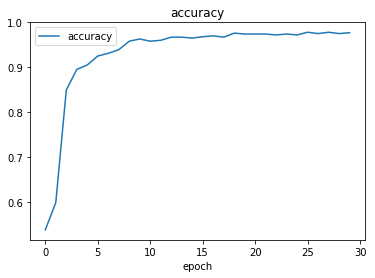

In [24]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

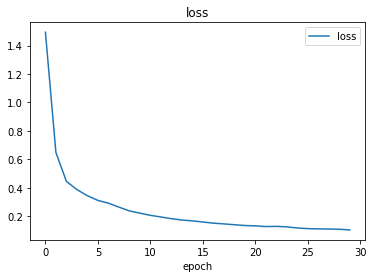

In [25]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [26]:
# save the trained model
model.save('binary_classification_model.h5') # creates a HDF5 file

In [30]:
del h # deletes the existing model

# load a trained model to use for prediction new data
model = load_model('binary_classification_model.h5')

In [76]:
def plot_decision_boundary(X, y, model):
    '''
        Goal: Predict a line to seperate our data into two dicrete classes with the best accurary
        How to that: The trained model only predicts based on a grid that represents coordinates of the point we want to predict.
                     In this case, we need prediction for all points
    '''
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 50) # return a 1-d array of 50 evenly spaced numbers over horizontal axis
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 50) # return a 1-d array of 50 evenly spaced numbers over vertical axis
    xx, yy = np.meshgrid(x_span, y_span)
        # numpy meshgrid allows us to reutrn coordinate to matrices from the input of the coordinate vectors
        # the end goal is from these two arrays we'll define a 50x50 grid which spans the entire horizontal and vartical range of data, a Cartesian grid that cover out dataset
    xx_, yy_ = xx.ravel(), yy.ravel() 
        # .ravel() allows to convert a 2-d array to a 1-d array
    grid = np.c_[xx_, yy_] # np.c_ concatenates 2 1-d arrays along to a grid, a 2-d matrix.
    prediction_function = model.predict(grid) 
        # the trained model will test all the points inside of our 50x50 grid and return a array of prediction, these predictions indicate probability of any point
        # prediction.shape = (2500, 1)
    z = prediction_function.reshape(xx.shape) # xx.shape = (50, 50)
        # reshape the array of prediction to be linked to appropriate coordinate.
    plt.contourf(xx, yy, z)
        # xx, yy represent the x, y coordinate in our grid respectively
        # z is a array that contains the magnitude of probability at each corresponding coordinates)

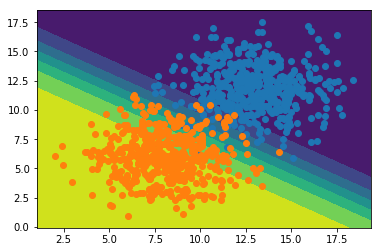

In [77]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1]) 

In [78]:
def new_data_prediction(x, y):
    '''predict a new unlabelled data'''
    point = np.array([[x, y]]) # prepare data for prediction
    
    prediction_probability = model.predict(point) # predict how many probability of new data is
    prediction_class = model.predict_classes(point) # predict which class of new data is
    print('probability: ', prediction_probability)
    print('class: ', prediction_class)
    
    plt.plot([x], [y], marker= 'o', markersize= 20, color= 'green')

probability:  [[0.93511945]]
class:  [[1]]


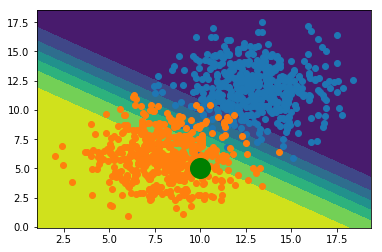

In [79]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1]) 
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

#coordinate of a new data point
x = 10
y = 5
new_data_prediction(x, y)